# Notebook Realizado

## Espacio Curricular: Práctica Profesionalizante 2

## Profesor: Mubarqui Fernando

## Grupo: 3

### Integrantes:

*   Altamiranda, Bruno Gabriel
*   Coria, Norberto Emiliano
*   Hamnstrom, Paul Martin
*   Paz, Claudia Lorena

## Sede: Fernández



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
path = "/content/gdrive/MyDrive/Hoja1.csv"

In [ ]:
# Importamos las librerias posiblemente necesarias de momento.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# Definimos al archivo csv como un pandas dataframe y llamamos a la lectura del archivo con pandas.
df = pd.read_csv(path)

In [ ]:
# Realizamos una lectura de las primera líneas dentro del archivo
df.head()

,Cod. Institución,SOLICITUD,ESTADO DE SOLICITUD,FECHA,Nro. de Nota,Proveedor,Monto
0,INST001,Colocación de aire acond.,Aceptado,31/5/2024,204,Sergio Castillo,48.000
1,INST001,2 Rejas para puerta corrediza,Aceptado,6/6/2024,219,Obrador,No especifica
2,INST002,5 Metros de Lienzo Ecológico Camuflado,Aceptado,12/6/2024,225,Desconocido,No especifica
3,INST003,Poda de Árboles,Aceptado,12/6/2024,226,Espacios Verdes,No especifica
4,INST003,Plomero,Aceptado,12/6/2024,227,Desconocido,No especifica


In [ ]:
# Revisamos la forma del dataset, es decir como está constituido.
print("Forma:", df.shape)

Forma: (356, 7)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356 entries, 0 to 355
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Cod. Institución     356 non-null    object
 1   SOLICITUD            356 non-null    object
 2   ESTADO DE SOLICITUD  356 non-null    object
 3   FECHA                356 non-null    object
 4   Nro. de Nota         342 non-null    object
 5   Proveedor            356 non-null    object
 6   Monto                356 non-null    object
dtypes: object(7)
memory usage: 19.6+ KB


In [ ]:
df.describe()

,Cod. Institución,SOLICITUD,ESTADO DE SOLICITUD,FECHA,Nro. de Nota,Proveedor,Monto
count,356,356,356,356,342,356,356
unique,53,311,5,82,342,34,24
top,INST003,Plomero,Aceptado,30/9/2024,565,Desconocido,No especifica
freq,53,10,323,13,1,260,296


In [ ]:
# Buscamos cantidad de datos nulos por categoria, para esto usaremos:
df.isnull().sum()

,0
Cod. Institución,0
SOLICITUD,0
ESTADO DE SOLICITUD,0
FECHA,0
Nro. de Nota,14
Proveedor,0
Monto,0


In [ ]:
print(df['Nro. de Nota'].isnull().sum())

14


In [ ]:
nan_percentage = df.isnull().mean() * 100
print("Porcentaje de NaNs por columna:\n", nan_percentage)

Porcentaje de NaNs por columna:
 Cod. Institución       0.000000
SOLICITUD              0.000000
ESTADO DE SOLICITUD    0.000000
FECHA                  0.000000
Nro. de Nota           3.932584
Proveedor              0.000000
Monto                  0.000000
dtype: float64


In [ ]:
# Rellenar espacios vacios en la columna "Nro. de Nota" con 0
df['Nro. de Nota'] = df['Nro. de Nota'].fillna(0)

In [ ]:
# Revisamos nuevamente que no haya valores nulos.
df.isnull().sum()

,0
Cod. Institución,0
SOLICITUD,0
ESTADO DE SOLICITUD,0
FECHA,0
Nro. de Nota,0
Proveedor,0
Monto,0


In [ ]:
df.tail(8)

,Cod. Institución,SOLICITUD,ESTADO DE SOLICITUD,FECHA,Nro. de Nota,Proveedor,Monto
348,INST016,Mano de obra para levantar cerca perimetral,Aceptado,23/12/2024,562,Obras Públicas,No especificado
349,INST005,"Colaboración para pagar cuota de Librería ""El ...",Aceptado,13/12/2024,563,El Autor,32.500
350,INST014,Insumos necesarios para instalación de cámaras...,Aceptado,2/12/2024,564,Desconocido,No especificado
351,INST002,20 Cubresillas para Acto de Egreso,Aceptado,5/12/2024,0,Desconocido,No especificado
352,INST053,Torta para brindis de acto de egresados,Aceptado,13/12/2024,0,Desconocido,No especificado
353,INST002,Colaboración para el pago de grabado en medall...,Aceptado,29/11/2024,0,Desconocido,15.000
354,INST014,Informe de denuncia penal por el ingreso de de...,INFORME,26/12/2024,0,Desconocido,No especificado
355,INST010,Arreglo y Compra de 3 Cerraduras,Aceptado,27/12/2024,565,ElectroChiq,No especificado


In [ ]:
df['FECHA'] = pd.to_datetime(df['FECHA'], errors='coerce')

/tmp/ipython-input-1852168690.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['FECHA'] = pd.to_datetime(df['FECHA'], errors='coerce')


In [ ]:
df.head()

,Cod. Institución,SOLICITUD,ESTADO DE SOLICITUD,FECHA,Nro. de Nota,Proveedor,Monto
0,INST001,Colocación de aire acond.,Aceptado,2024-05-31,204,Sergio Castillo,48.000
1,INST001,2 Rejas para puerta corrediza,Aceptado,2024-06-06,219,Obrador,No especifica
2,INST002,5 Metros de Lienzo Ecológico Camuflado,Aceptado,2024-06-12,225,Desconocido,No especifica
3,INST003,Poda de Árboles,Aceptado,2024-06-12,226,Espacios Verdes,No especifica
4,INST003,Plomero,Aceptado,2024-06-12,227,Desconocido,No especifica


In [ ]:
# crear una columna mes con el nombre del mes en el df

# Extraemos el nombre del mes de la columna FECHA
df['mes'] = df['FECHA'].dt.strftime('%B')

# Reemplazamos los valores de la columna con nombres en español
mes_en_a_es = {
    'January':   'enero',
    'February':  'febrero',
    'March':     'marzo',
    'April':     'abril',
    'May':       'mayo',
    'June':      'junio',
    'July':      'julio',
    'August':    'agosto',
    'September': 'septiembre',
    'October':   'octubre',
    'November':  'noviembre',
    'December':  'diciembre'
}

df['mes'] = df['mes'].map(mes_en_a_es).fillna('Desconocido')

In [ ]:
# Muestra del dataframe actualizado
display(df.head())

,Cod. Institución,SOLICITUD,ESTADO DE SOLICITUD,FECHA,Nro. de Nota,Proveedor,Monto,mes
0,INST001,Colocación de aire acond.,Aceptado,2024-05-31,204,Sergio Castillo,48.000,mayo
1,INST001,2 Rejas para puerta corrediza,Aceptado,2024-06-06,219,Obrador,No especifica,junio
2,INST002,5 Metros de Lienzo Ecológico Camuflado,Aceptado,2024-06-12,225,Desconocido,No especifica,junio
3,INST003,Poda de Árboles,Aceptado,2024-06-12,226,Espacios Verdes,No especifica,junio
4,INST003,Plomero,Aceptado,2024-06-12,227,Desconocido,No especifica,junio


In [ ]:
df.head()

,Cod. Institución,SOLICITUD,ESTADO DE SOLICITUD,FECHA,Nro. de Nota,Proveedor,Monto,mes
0,INST001,Colocación de aire acond.,Aceptado,2024-05-31,204,Sergio Castillo,48.000,mayo
1,INST001,2 Rejas para puerta corrediza,Aceptado,2024-06-06,219,Obrador,No especifica,junio
2,INST002,5 Metros de Lienzo Ecológico Camuflado,Aceptado,2024-06-12,225,Desconocido,No especifica,junio
3,INST003,Poda de Árboles,Aceptado,2024-06-12,226,Espacios Verdes,No especifica,junio
4,INST003,Plomero,Aceptado,2024-06-12,227,Desconocido,No especifica,junio


In [ ]:
df['Monto_limpio'] = pd.to_numeric(df['Monto'].str.replace('[^\d.]', '', regex=True), errors='coerce')

In [ ]:
df.head()

,Cod. Institución,SOLICITUD,ESTADO DE SOLICITUD,FECHA,Nro. de Nota,Proveedor,Monto,mes,Monto_limpio
0,INST001,Colocación de aire acond.,Aceptado,2024-05-31,204,Sergio Castillo,48.000,mayo,48.0
1,INST001,2 Rejas para puerta corrediza,Aceptado,2024-06-06,219,Obrador,No especifica,junio,NaN
2,INST002,5 Metros de Lienzo Ecológico Camuflado,Aceptado,2024-06-12,225,Desconocido,No especifica,junio,NaN
3,INST003,Poda de Árboles,Aceptado,2024-06-12,226,Espacios Verdes,No especifica,junio,NaN
4,INST003,Plomero,Aceptado,2024-06-12,227,Desconocido,No especifica,junio,NaN


In [ ]:
# codigo para eliminar columna mes_nombre

df = df.drop(columns=['mes_nombre'])
df.head()


KeyError: "['mes_nombre'] not found in axis"

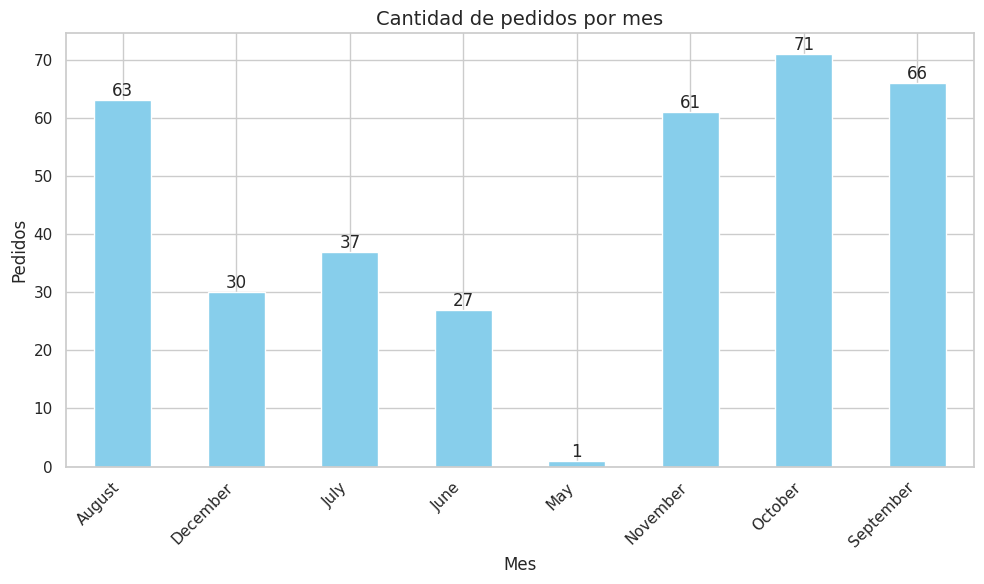

In [ ]:
# Extraemos el nombre del mes de la columna FECHA
df['mes'] = df['FECHA'].dt.strftime('%B')


# Calculamos el numero de solicitudes por mes
pedidos_mes = df.groupby('mes').size()

# Creamos el grafico de barras
plt.figure(figsize=(10, 6))
ax = pedidos_mes.plot(kind='bar', color='skyblue')
plt.title('Cantidad de pedidos por mes', fontsize=14)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Pedidos', fontsize=12)
plt.xticks(rotation=45, ha='right')

for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.tight_layout()
plt.show()

In [ ]:
# Agrupar por institución y mes y contar la cantidad de pedidos
pedidos_por_inst_y_mes = df.groupby(['Cod. Institución', 'mes']).size().reset_index(name='cantidad_pedidos')

# Mostrar el resultado
print(pedidos_por_inst_y_mes)

    Cod. Institución       mes  cantidad_pedidos
0            INST001      June                 1
1            INST001       May                 1
2            INST001   October                 1
3            INST002    August                 3
4            INST002  December                 1
..               ...       ...               ...
150          INST049  November                 1
151          INST050  November                 1
152          INST051  December                 2
153          INST052  December                 1
154          INST053  December                 1

[155 rows x 3 columns]


In [ ]:
# 2. Filtrar solo las solicitudes con estado "Aceptado"
df_aceptado = df[df["ESTADO DE SOLICITUD"].str.strip().str.lower() == "aceptado"]

In [ ]:
# 3. Contar la cantidad de solicitudes aceptadas por institución
conteo_instituciones = df_aceptado["Cod. Institución"].value_counts().reset_index()
conteo_instituciones.columns = ["Cod. Institución", "Cantidad de Solicitudes"]

In [ ]:
# 4. Mostrar por consola el top de instituciones
print("Instituciones con más solicitudes aceptadas:")
print(conteo_instituciones)

Instituciones con más solicitudes aceptadas:
   Cod. Institución  Cantidad de Solicitudes
0           INST003                       50
1           INST010                       28
2           INST012                       22
3           INST002                       19
4           INST007                       16
5           INST014                       11
6           INST015                       11
7           INST013                       10
8           INST017                       10
9           INST005                       10
10          INST026                        9
11          INST024                        9
12          INST035                        9
13          INST018                        8
14          INST029                        8
15          INST011                        7
16          INST016                        7
17          INST008                        7
18          INST027                        6
19          INST023                        6
20        

/tmp/ipython-input-786232859.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


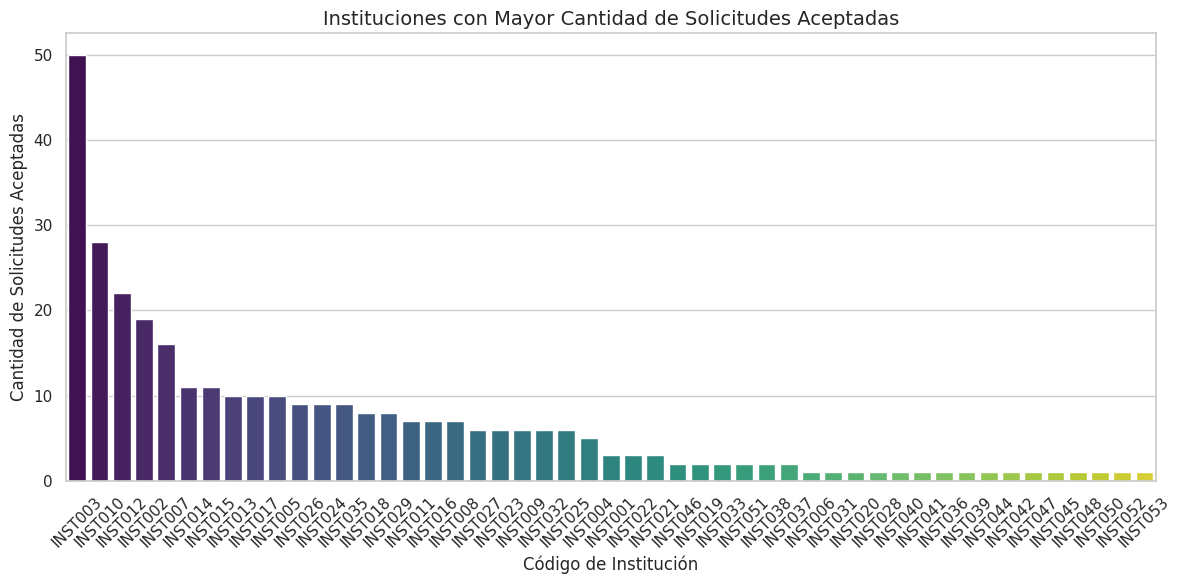

In [ ]:
# 5. Crear gráfico de barras con Seaborn
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

sns.barplot(
    data=conteo_instituciones,
    x="Cod. Institución",
    y="Cantidad de Solicitudes",
    palette="viridis"
)

# 6. Personalización del gráfico
plt.title("Instituciones con Mayor Cantidad de Solicitudes Aceptadas", fontsize=14)
plt.xlabel("Código de Institución")
plt.ylabel("Cantidad de Solicitudes Aceptadas")
plt.xticks(rotation=45)
plt.tight_layout()

# 7. Mostrar el gráfico
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [ ]:
# Filtrar solicitudes aceptadas
df_aceptado = df[df["ESTADO DE SOLICITUD"].str.strip().str.lower() == "aceptado"]

In [ ]:
# Tomar solo las columnas necesarias
solicitudes = df_aceptado["SOLICITUD"].fillna("").astype(str)

In [ ]:
# Vectorización TF-IDF
spanish_stop_words = [
    "de", "la", "el", "en", "y", "a", "los", "las", "un", "una", "unos", "unas",
    "por", "con", "para", "que", "se", "es", "al", "del", "lo", "más", "su",
    "sus", "o", "u", "este", "esta", "estos", "estas", "ese", "esa", "esos",
    "esas", "aquel", "aquella", "aquellos", "aquellas", "mi", "mis", "tu",
    "tus", "su", "sus", "nuestro", "nuestra", "nuestros", "nuestras", "vuestro",
    "vuestra", "vuestros", "vuestras", "mío", "mía", "míos", "mías", "tuyo",
    "tuya", "tuyos", "tuyas", "suyo", "suya", "suyos", "suyas", "nuestro",
    "nuestra", "nuestros", "nuestras", "vuestro", "vuestra", "vuestros",
    "vuestras", "mí", "ti", "él", "ella", "ello", "nosotros", "nosotras",
    "vosotros", "vosotras", "ellos", "ellas", "lo", "la", "le", "les", "me",
    "te", "se", "nos", "os", "aquí", "ahí", "allí", "casi", "como", "en",
    "entonces", "incluso", "luego", "más", "menos", "mientras", "modo", "mucho",
    "poco", "tanto", "tan", "muy", "siempre", "nunca", "ya", "dentro", "fuera",
    "cerca", "lejos", "donde", "cuando", "como", "cual", "cuales", "cuanto",
    "cuanta", "cuantos", "cuantas", "quien", "quienes", "que", "por", "para",
    "sin", "bajo", "sobre", "tras", "mediante", "durante", "versus"
]
vectorizer = TfidfVectorizer(stop_words=spanish_stop_words)
X = vectorizer.fit_transform(solicitudes)

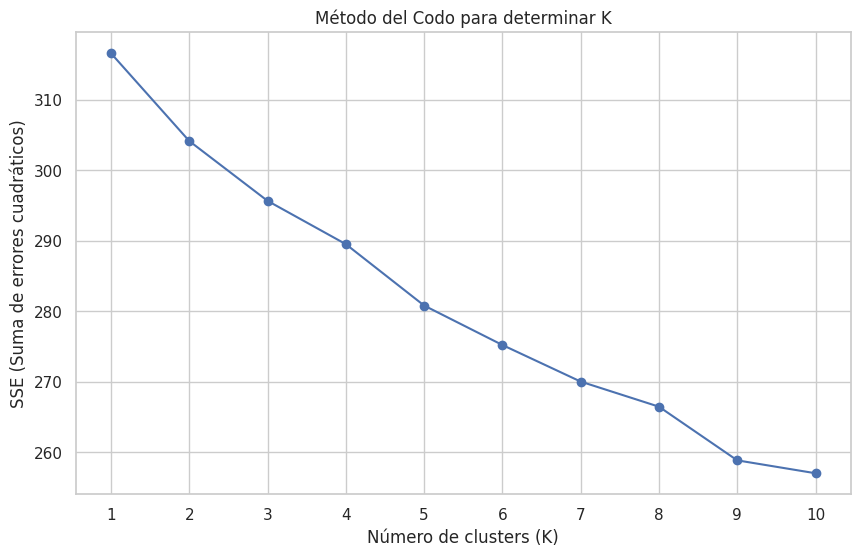

Observa el gráfico para identificar el 'codo' donde la disminución de SSE comienza a ralentizarse. Ese punto sugiere un número adecuado de clusters (K).


In [ ]:
# saber cuantos clusters agregar por metodo del codo

import matplotlib.pyplot as plt
sse = []
# Probar diferentes números de clusters
for k in range(1, 11):  # Puedes ajustar el rango de k según tus necesidades
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Método del Codo para determinar K')
plt.xlabel('Número de clusters (K)')
plt.ylabel('SSE (Suma de errores cuadráticos)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

print("Observa el gráfico para identificar el 'codo' donde la disminución de SSE comienza a ralentizarse. Ese punto sugiere un número adecuado de clusters (K).")

In [ ]:
# Elegir cantidad de clusters
n_clusters = 5  # puedes ajustar este número

In [ ]:
# Aplicar KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_aceptado["Cluster"] = kmeans.fit_predict(X)

/tmp/ipython-input-2966014293.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aceptado["Cluster"] = kmeans.fit_predict(X)


In [ ]:
# Mostrar algunas filas con el cluster asignado
print(df_aceptado[["Cod. Institución", "SOLICITUD", "Cluster"]].head(10))

   Cod. Institución                                          SOLICITUD  \
0           INST001                         Colocación de aire acond.    
1           INST001                      2 Rejas para puerta corrediza   
2           INST002             5 Metros de Lienzo Ecológico Camuflado   
3           INST003                                    Poda de Árboles   
4           INST003                                            Plomero   
5           INST003                               Candado para Portón    
6           INST004                     Árboles de Jacarandá o Lapacho   
8           INST006                                            Plomero   
9           INST007  25 Kg de Harina, 5 Kg de Grasa y 1 Paq de Leva...   
10          INST005                                            Plomero   

    Cluster  
0         0  
1         2  
2         2  
3         2  
4         2  
5         2  
6         2  
8         2  
9         3  
10        2  


In [ ]:
# Conteo por cluster
conteo_cluster = df_aceptado["Cluster"].value_counts().sort_index()

/tmp/ipython-input-1377217481.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_cluster.index, y=conteo_cluster.values, palette="Set2")


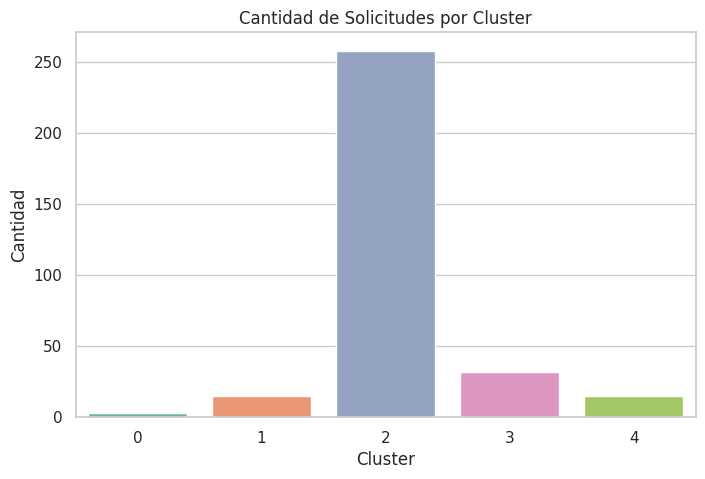

In [ ]:
# Graficar distribución de clusters
plt.figure(figsize=(8, 5))
sns.barplot(x=conteo_cluster.index, y=conteo_cluster.values, palette="Set2")
plt.title("Cantidad de Solicitudes por Cluster")
plt.xlabel("Cluster")
plt.ylabel("Cantidad")
plt.show()

####Se observa que el Cluster 2 concentra la mayor cantidad de casos, con 258 solicitudes. El Cluster 3 le sigue en tamaño, con 32 solicitudes. El Cluster 4 tiene un número similar de solicitudes al Cluster 1, con 15 solicitudes. El Cluster 1 presenta un volumen menor, con 15 solicitudes. Finalmente, el Cluster 0 es el más pequeño, con solo 3 solicitudes.

In [ ]:
# Mostrar ejemplos de solicitudes del cluster 2
cluster_id = 2

print(f"\nEjemplos del Cluster {cluster_id}:\n")
ejemplos = df_aceptado[df_aceptado["Cluster"] == cluster_id]["SOLICITUD"].sample(10, random_state=1)

for i, solicitud in enumerate(ejemplos, 1):
    print(f"{i}. {solicitud}")


Ejemplos del Cluster 2:

1. Art. De Limpieza
2. Pago de 13 Libretas
3. Sonido móvil y sonido fijo para Marcha de los Bombitos
4. Aporte para pago total del transporte escolar Diciembre
5. Artículos de limpieza
6. Fotógrafo para foto grupal de egresados 
7. Aporte para pago mensual Transporte Octubre ($120.000 del Total $516.000)
8. 1 Regulador para Cocina
9. Construcción de Tapia perimetral 13 mts. De largo 1.80 alto
10. Personal de Tránsito y vallas para la Marcha de los Bombitos


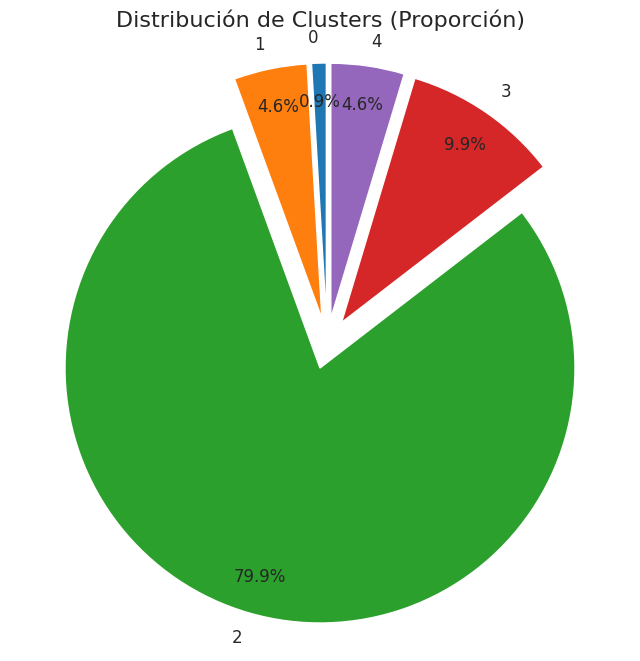

In [ ]:
# Gráfico de torta
conteo_cluster = df_aceptado["Cluster"].value_counts().sort_index()
plt.figure(figsize=(8, 8))
plt.pie(conteo_cluster, labels=conteo_cluster.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("tab10"), textprops={'fontsize': 12}, explode=[0.1] * len(conteo_cluster), pctdistance=0.85) # Agregamos pctdistance
plt.title("Distribución de Clusters (Proporción)", fontsize=16)
plt.axis('equal')
plt.show()

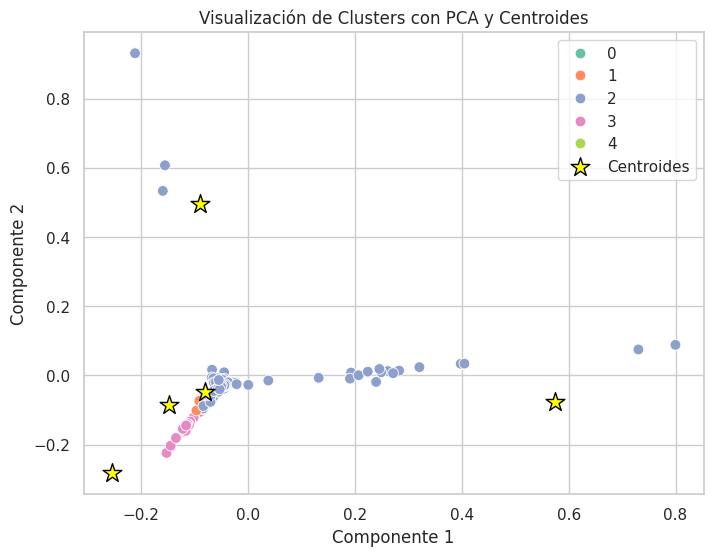

In [ ]:
# Gráfico de dispersión (con reducción de dimensiones)

from sklearn.decomposition import PCA

# Reducir a 2 dimensiones para graficar
X_reducido = PCA(n_components=2).fit_transform(X.toarray())

# Crear DataFrame para graficar
df_plot = pd.DataFrame(X_reducido, columns=["Componente 1", "Componente 2"])
df_plot["Cluster"] = df_aceptado["Cluster"].values

# Calculate centroids after PCA
centroids_pca = PCA(n_components=2).fit_transform(kmeans.cluster_centers_)

# Gráfico de dispersión
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_plot, x="Componente 1", y="Componente 2", hue="Cluster", palette="Set2", s=60, legend="full")
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='*', s=200, color='yellow', edgecolor='black', label='Centroides')
plt.title("Visualización de Clusters con PCA y Centroides")
plt.legend()
plt.show()

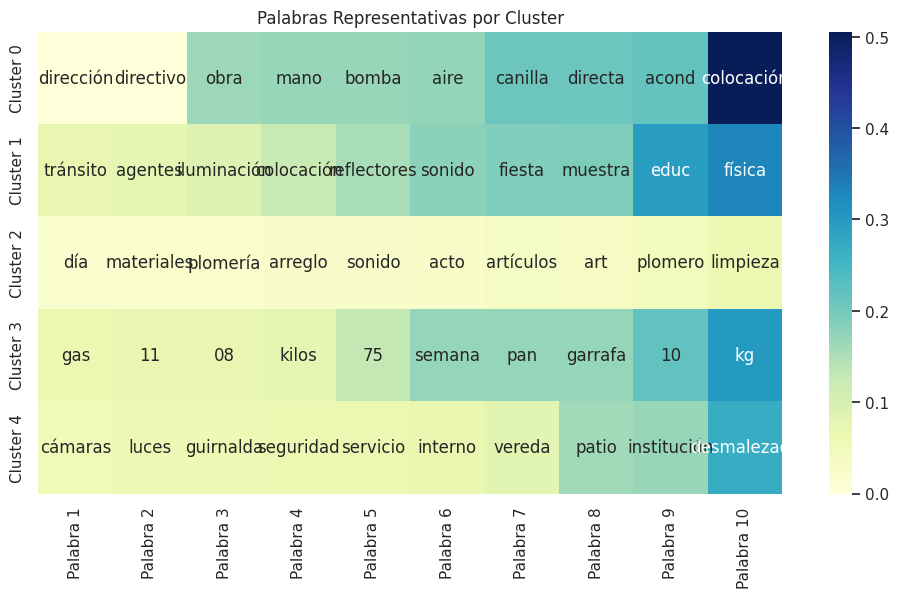

In [ ]:
# Heatmap (Mapa de calor de palabras comunes por cluster)

# Palabras más frecuentes por cluster
top_n = 10
feature_names = vectorizer.get_feature_names_out()

# Sumar TF-IDF por cluster
cluster_tf_idf = np.zeros((n_clusters, len(feature_names)))

# Reiniciamos el índice de df_aceptado para alinearlo con la matriz X
df_aceptado_reset = df_aceptado.reset_index(drop=True)

for i in range(n_clusters):
    indices = df_aceptado_reset[df_aceptado_reset["Cluster"] == i].index
    cluster_matrix = X[indices]
    cluster_tf_idf[i, :] = cluster_matrix.mean(axis=0).A1

# Seleccionar top palabras
top_palabras_idx = np.argsort(cluster_tf_idf, axis=1)[:, -top_n:]
top_palabras = np.array(feature_names)[top_palabras_idx]

# Crear DataFrame para heatmap
heatmap_data = pd.DataFrame(
    cluster_tf_idf[np.arange(n_clusters)[:, None], top_palabras_idx],
    columns=[f"Palabra {i+1}" for i in range(top_n)],
    index=[f"Cluster {i}" for i in range(n_clusters)]
)

# Mostrar heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=top_palabras, fmt="", cmap="YlGnBu")
plt.title("Palabras Representativas por Cluster")
plt.show()

In [ ]:
# Analizar características por cluster

# Agrupar por cluster
grupos_por_cluster = df_aceptado.groupby("Cluster")

# Explorar características para cada cluster
for cluster_id, grupo in grupos_por_cluster:
    print(f"--- Análisis para el Cluster {cluster_id} ---")

    # Proveedores más comunes en este cluster
    print("\nProveedores más comunes:")
    print(grupo["Proveedor"].value_counts().head())

    # Tipos de solicitudes más comunes en este cluster
    print("\nTipos de solicitudes más comunes:")
    print(grupo["SOLICITUD"].value_counts().head())

    # Estadísticas descriptivas para el monto limpio en este cluster
    print("\nEstadísticas de Monto:")
    if not grupo["Monto_limpio"].isnull().all(): # Check if there are non-null values
        print(grupo["Monto_limpio"].describe())
    else:
        print("No hay montos numéricos disponibles para este cluster.")

    print("-" * 30)

In [ ]:
from sklearn.metrics import silhouette_score

# Evaluar el modelo con el coeficiente de silueta
silhouette_avg = silhouette_score(X, df_aceptado["Cluster"])
print(f"Coeficiente de Silueta: {silhouette_avg}")